In [1]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.metrics import accuracy_score
from torchvision import datasets, transforms
from tqdm.auto import tqdm

import models

In [2]:
import importlib
importlib.reload(models)

<module 'models' from '/home/mma6789/Stuff/Studies/sem4/fmse/project/models.py'>

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3, 1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3, 1), 'GB')

# Set random seed for reproducibility
torch.manual_seed(42)

Using device: cuda
Quadro RTX 6000
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


In [17]:
base_dir = '/home/mma6789/Stuff/Studies/sem4/fmse/project' #@param {type: 'string'}
method = 'CNN' #@param ['CNN', 'DNN']

In [18]:
# Load MNIST train and test dataset
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST(f'{base_dir}/data', train=True, download=True, transform=transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.1307,), (0.3081,)),
            ])),
        batch_size=32, shuffle=True)

valid_loader = torch.utils.data.DataLoader(
    datasets.MNIST(f'{base_dir}/data', train=False, transform=transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.1307,), (0.3081,)),
            ])),
        batch_size=32, shuffle=True)

In [19]:
def train_epoch():
    model.train(True)
    running_loss = 0.0
    y_true = []
    y_pred = []
    
    for batch_index, batch in enumerate(tqdm(train_loader, desc=f'Epoch {epoch + 1} train')):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        
        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()
        
        y_true += y_batch.flatten().tolist()
        y_pred += torch.argmax(output, dim=1).cpu().detach().numpy().tolist()
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    avg_batch_loss = running_loss / len(train_loader)
    acc = accuracy_score(y_true, y_pred)
    
    train_loss.append(avg_batch_loss)
    train_acc.append(acc)
    
    print('Train epoch results:')
    print(f'Loss: {avg_batch_loss}')
    print(f'Acc: {acc}')

In [20]:
def valid_epoch():
    model.train(False)
    running_loss = 0.0
    y_true = []
    y_pred = []
    
    for batch_index, batch in enumerate(tqdm(valid_loader, desc=f'Epoch {epoch + 1} valid')):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        
        with torch.no_grad():
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()
        
        y_true += y_batch.flatten().tolist()
        y_pred += torch.argmax(output, dim=1).cpu().detach().numpy().tolist()

    avg_batch_loss = running_loss / len(valid_loader)
    acc = accuracy_score(y_true, y_pred)
    
    valid_loss.append(avg_batch_loss)
    valid_acc.append(acc)
    
    print('Valid epoch results:')
    print(f'Loss: {avg_batch_loss}')
    print(f'Acc: {acc}')

In [21]:
## Import model
if method == 'CNN':
    model = models.CNN().to(device)
elif method == 'DNN':
    model = models.DNN().to(device)

In [22]:
## Model Parameters
learning_rate = 0.001
epochs = 10

loss_function = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [23]:
## Train model
train_loss = []
train_acc = []
valid_loss = []
valid_acc = []

for epoch in tqdm(range(epochs), desc='Training progress'):
    train_epoch()
    valid_epoch()

Training progress:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1 train:   0%|          | 0/1875 [00:00<?, ?it/s]

Train epoch results:
Loss: 0.19501551821579535
Acc: 0.9402833333333334


Epoch 1 valid:   0%|          | 0/313 [00:00<?, ?it/s]

Valid epoch results:
Loss: 0.0471677897692719
Acc: 0.9848


Epoch 2 train:   0%|          | 0/1875 [00:00<?, ?it/s]

Train epoch results:
Loss: 0.0897892549853151
Acc: 0.97355


Epoch 2 valid:   0%|          | 0/313 [00:00<?, ?it/s]

Valid epoch results:
Loss: 0.03677424504782427
Acc: 0.988


Epoch 3 train:   0%|          | 0/1875 [00:00<?, ?it/s]

Train epoch results:
Loss: 0.0687461927848092
Acc: 0.9791333333333333


Epoch 3 valid:   0%|          | 0/313 [00:00<?, ?it/s]

Valid epoch results:
Loss: 0.03475143239797407
Acc: 0.9886


Epoch 4 train:   0%|          | 0/1875 [00:00<?, ?it/s]

Train epoch results:
Loss: 0.05537711522929991
Acc: 0.9832166666666666


Epoch 4 valid:   0%|          | 0/313 [00:00<?, ?it/s]

Valid epoch results:
Loss: 0.03492389820056228
Acc: 0.9886


Epoch 5 train:   0%|          | 0/1875 [00:00<?, ?it/s]

Train epoch results:
Loss: 0.048798487842496255
Acc: 0.9846833333333334


Epoch 5 valid:   0%|          | 0/313 [00:00<?, ?it/s]

Valid epoch results:
Loss: 0.029695400257213234
Acc: 0.9905


Epoch 6 train:   0%|          | 0/1875 [00:00<?, ?it/s]

Train epoch results:
Loss: 0.04405752720748617
Acc: 0.9862833333333333


Epoch 6 valid:   0%|          | 0/313 [00:00<?, ?it/s]

Valid epoch results:
Loss: 0.029666921076350612
Acc: 0.9912


Epoch 7 train:   0%|          | 0/1875 [00:00<?, ?it/s]

Train epoch results:
Loss: 0.037520301359424774
Acc: 0.9878


Epoch 7 valid:   0%|          | 0/313 [00:00<?, ?it/s]

Valid epoch results:
Loss: 0.030993179731376004
Acc: 0.9915


Epoch 8 train:   0%|          | 0/1875 [00:00<?, ?it/s]

Train epoch results:
Loss: 0.03368680582511054
Acc: 0.98915


Epoch 8 valid:   0%|          | 0/313 [00:00<?, ?it/s]

Valid epoch results:
Loss: 0.041028437591453935
Acc: 0.9895


Epoch 9 train:   0%|          | 0/1875 [00:00<?, ?it/s]

Train epoch results:
Loss: 0.03249436335249229
Acc: 0.9897666666666667


Epoch 9 valid:   0%|          | 0/313 [00:00<?, ?it/s]

Valid epoch results:
Loss: 0.037366600813218014
Acc: 0.9907


Epoch 10 train:   0%|          | 0/1875 [00:00<?, ?it/s]

Train epoch results:
Loss: 0.030251351187301042
Acc: 0.9908666666666667


Epoch 10 valid:   0%|          | 0/313 [00:00<?, ?it/s]

Valid epoch results:
Loss: 0.03350641632312944
Acc: 0.9917


In [24]:
## Save model to file
torch.save(model.state_dict(), f'{base_dir}/models/MNIST_{method}_{learning_rate}.pt')

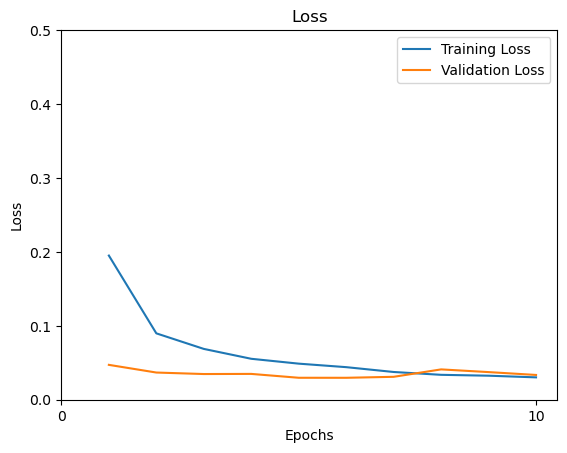

In [25]:
## Loss graph
plt.plot(range(1, epochs + 1), train_loss, label='Training Loss')
plt.plot(range(1, epochs + 1), valid_loss, label='Validation Loss')
 
plt.title(f'Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.xticks(range(0, epochs + 1, 10))
plt.legend(loc='best')
plt.ylim(bottom=0, top=0.5)
plt.show()

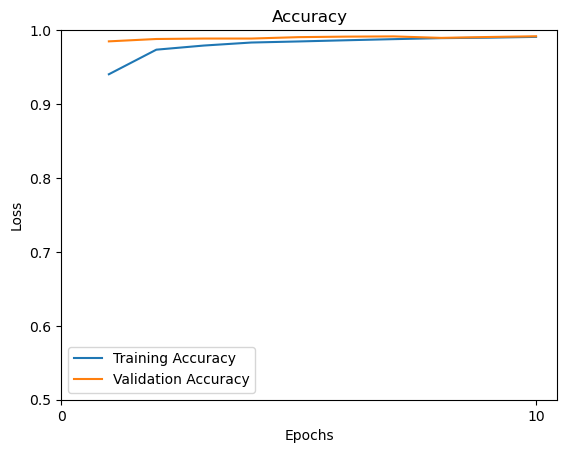

In [26]:
## Accuracy graph
plt.plot(range(1, epochs + 1), train_acc, label='Training Accuracy')
plt.plot(range(1, epochs + 1), valid_acc, label='Validation Accuracy')
 
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.xticks(range(0, epochs + 1, 10))
plt.legend(loc='best')
plt.ylim(bottom=0.5, top=1)
plt.show()